# TW1 


## Exploratory Data Analysis

- See the examples of basic visualization and Pandas on Canvas. 

#### Write full names of your team members here

- Pedro De Almeida Voto

- Anh Tran

-



## Advertising data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

A toy dataset for your exploratory data analysis:

./data/Advertising.csv

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy 
from scipy.stats.stats import pearsonr

# read CSV file stored in the current directory and save the results
data = pd.read_csv('./data/Advertising.csv', skipinitialspace=True, index_col=0, parse_dates=True, infer_datetime_format=True)

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
2019-03-11,230.1,37.8,69.2,22.1
2019-03-12,44.5,39.3,45.1,10.4
2019-03-13,17.2,45.9,69.3,9.3
2019-03-14,151.5,41.3,58.5,18.5
2019-03-15,180.8,10.8,58.4,12.9


What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

In [165]:
#display all data. You can uncomment the code in the next line

display(data)

data.shape

,TV,Radio,Newspaper,Sales
2019-03-11,230.1,37.8,69.2,22.1
2019-03-12,44.5,39.3,45.1,10.4
2019-03-13,17.2,45.9,69.3,9.3
2019-03-14,151.5,41.3,58.5,18.5
2019-03-15,180.8,10.8,58.4,12.9
...,...,...,...,...
2019-09-22,38.2,3.7,13.8,7.6
2019-09-23,94.2,4.9,8.1,9.7
2019-09-24,177.0,9.3,6.4,12.8
2019-09-25,283.6,42.0,66.2,25.5


(200, 4)

## Part 1 Tasks

Create cells to solve each of the following problems. Check the example Python codes for data visualization (TW1 on Canvas). 

(1) For each field of the data, what is the mean of the data? What is the median? Are there any dataset has mode value? 

(2) For each field of the data, give the five-number summary, minimum, the first quartile (Q1), median, the third quartile (Q3), and maximum of the data.

(3) For each field of the data, visulize a boxplot of the data and compare it to your answer in (b). 

(4) For Sales, visualize distribution of the data using histogram. Comment on the data’s modality (i.e., bimodal, trimodal, etc.)

(5) For Sales, visualize the trend of the data over time using a graph. 

(6) For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), calculate the Pearson's correlation coefficient factor r. 

(7) For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), visualize scatter graph. 


In [205]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [166]:
#(1) For each field of the data, what is the mean of the data? What is the median? Are there any dataset has mode value?
data.mean()


TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         14.0225
dtype: float64

In [167]:
data.median()

TV           149.75
Radio         22.90
Newspaper     25.75
Sales         12.90
dtype: float64

In [168]:
# All datasets (TV, Radio, Newspaper, Sales) have mode value(s). 
data.mode()

,TV,Radio,Newspaper,Sales
0,17.2,4.1,8.7,9.7
1,76.4,5.7,9.3,NaN
2,109.8,NaN,25.6,NaN
3,177.0,NaN,NaN,NaN
4,184.9,NaN,NaN,NaN
5,197.6,NaN,NaN,NaN
6,199.8,NaN,NaN,NaN
7,222.4,NaN,NaN,NaN
8,237.4,NaN,NaN,NaN
9,240.1,NaN,NaN,NaN


In [169]:
#(2) For each field of the data, give the five-number summary, minimum, the first quartile (Q1), median, the third quartile (Q3), and maximum of the data.
data.min()

TV           0.7
Radio        0.0
Newspaper    0.3
Sales        1.6
dtype: float64

In [170]:
data.quantile(0.25)

TV           74.375
Radio         9.975
Newspaper    12.750
Sales        10.375
Name: 0.25, dtype: float64

In [171]:
data.quantile(0.50)

TV           149.75
Radio         22.90
Newspaper     25.75
Sales         12.90
Name: 0.5, dtype: float64

In [172]:
data.quantile(0.75)

TV           218.825
Radio         36.525
Newspaper     45.100
Sales         17.400
Name: 0.75, dtype: float64

In [173]:
data.max()

TV           296.4
Radio         49.6
Newspaper    114.0
Sales         27.0
dtype: float64

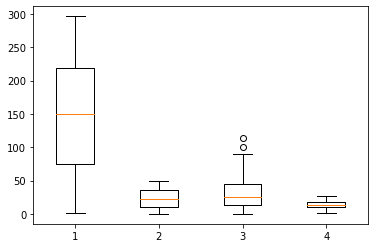

In [181]:
#(3) For each field of the data, visulize a boxplot of the data and compare it to your answer in (b). 
# The data points from problem number 2 forms the five points on the box plot for each field.
fig, ax1 = plt.subplots(1, 1)

ax1.boxplot([data['TV'], data['Radio'], data['Newspaper'], data['Sales']])

plt.show()

(array([ 2.,  9., 20., 47., 35., 29., 22., 17., 12.,  7.]),
 array([ 1.6 ,  4.14,  6.68,  9.22, 11.76, 14.3 , 16.84, 19.38, 21.92,
        24.46, 27.  ]),
 <BarContainer object of 10 artists>)

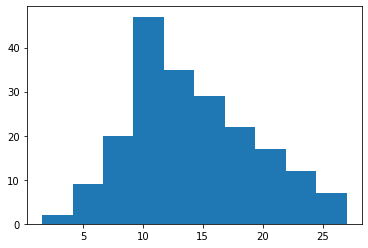

In [182]:
#(4) For Sales, visualize distribution of the data using histogram. Comment on the data’s modality (i.e., bimodal, trimodal, etc.)
# The data is unimodal. There is only a single peak on the graph. 
# Histogram
fig, ax1 = plt.subplots(1, 1)
ax1.hist(data['Sales'])

Text(0.5, 1.0, 'Sales Over Time')

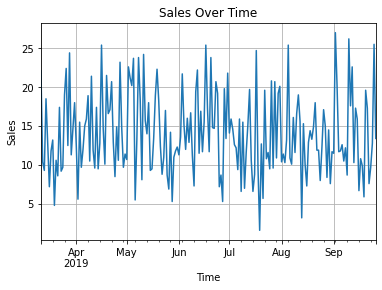

In [201]:
#(5) For Sales, visualize the trend of the data over time using a graph. 
data['Sales'].plot(grid=True)
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Sales Over Time')

In [202]:
#(6) For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), calculate the Pearson's correlation coefficient factor r.
TV = data['TV']
Sales = data['Sales']
Radio = data['Radio']
Newspaper = data['Newspaper']

pearson_coefficient, p_value = pearsonr(TV,Sales)
print ('TV-Sales - pearson correlation coefficient: %0.3f' % (pearson_coefficient))

TV-Sales - pearson correlation coefficient: 0.782


In [203]:
pearson_coefficient, p_value = pearsonr(Radio,Sales)
print ('Radio-Sales - pearson correlation coefficient: %0.3f' % (pearson_coefficient))

Radio-Sales - pearson correlation coefficient: 0.576


In [204]:
pearson_coefficient, p_value = pearsonr(Newspaper,Sales)
print ('Newspaper-Sales - pearson correlation coefficient: %0.3f' % (pearson_coefficient))

Newspaper-Sales - pearson correlation coefficient: 0.228


In [ ]:
#(7) For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), visualize scatter graph.

Text(0.5, 1.0, 'TV-Sales')

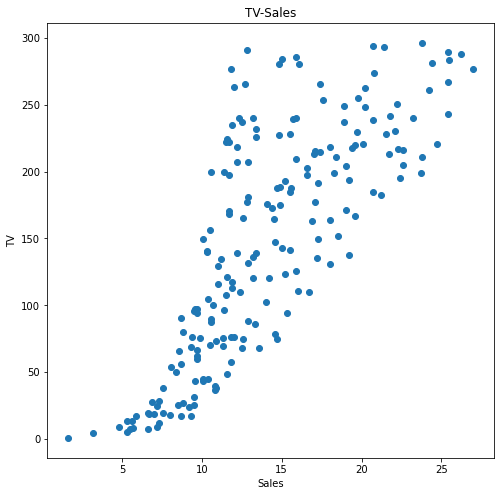

In [193]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(data['Sales'], data['TV'])
plt.ylabel('TV')
plt.xlabel('Sales')
plt.title('TV-Sales')

Text(0.5, 1.0, 'Radio-Sales')

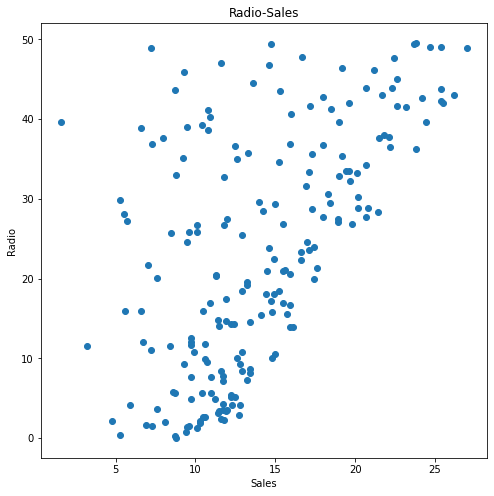

In [195]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(data['Sales'], data['Radio'])
plt.ylabel('Radio')
plt.xlabel('Sales')
plt.title('Radio-Sales')

Text(0.5, 1.0, 'Newspaper-Sales')

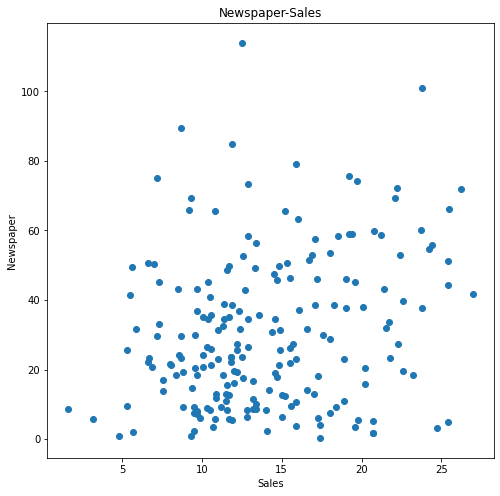

In [196]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(data['Sales'], data['Newspaper'])
plt.ylabel('Newspaper')
plt.xlabel('Sales')
plt.title('Newspaper-Sales')

## Part 2
Write a summary of what you find from the data

## Summary
First, we measured the Central Tendency of the data by finding the mean, median, and mode. There seems to be no skew for TV, and a positive skew (mode < median < mean) for Radio, Newspaper, and Sales. Second, we measured the dispersion of the data by finding the five number summary (minimum, Q1, median, Q3, and maximum), and plotting a boxplot of the data. Third, we plotted a histogram of the Sales data and found that it is unimodal and positive skewed which is a good check on our central tendency calculation. Next, we plotted the sales data over time to see if there is any trend. The only trend we could see is that the data is concentrated between 5 and 25 sales (in thousands of items) over all recorded time, and a good trend line assumption would be around 15 sales (in thousands of items).  

The correlation is all positive with varying strengths. TV and sales have a very strong positive relationship with each other because the correlation r is over 0.70. Radio and sales have a correlation of 0.576 which is a strong positive relationship. Newspaper and sales is 0.228 which is a weak positive relationship. So, in general, advertising on TV, radio and Newspaper all increases sales. However, the efficacy is greatest with TV adds followed by radio and lastly by newspaper advertisement.  This reflected in the scatter plots for each relationship. TV-Sales has a steep linear curve if we draw the regression line on the scatterplot. Radio and sales scatterplot is not as concentrated together with a clear trend rather it is dispersed and more positive trending. If we use a regression line it would not be as steep as TV and Sales. Newspaper and sales data is very scattered with no clear visible trend upon visual analysis, although when calculating the correlation there is a weak positive trend.  

If we were to recommend a firm on the most effective advertisement strategy it would be TV advertisement.  

### Resources

#### Boxplot
https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51


- matplotlib.pyplot boxplot demo
https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html


#### matplotlib.pyplot
- scatter plot
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.scatter.html


- histogram plot
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.hist.html


#### pandas DataFrame
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html


- describe()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html


- corr()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html


- hist()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html


- plot.scatter()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html


- pivot()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html